In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

Read in data from csv file

Using the Neuroguide system (NG Deluxe 3.0.5; Applied Neuroscience, Inc., Largo, FL, USA), continuous EEG data were converted into the frequency domain using the fast Fourier transformation (FFT) with the following parameters: epoch = 2 s, sample rate = 128 samples/s (256 digital time points), frequency range = 0.5–40 Hz, and a resolution of 0.5 Hz with a cosine taper window to minimize leakage.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MLdata/Copy of EEG.machinelearing_data_BRMH.csv')
data.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [5]:
#Get a specific disorder and compare it to the control across all electrodes
def disorder_vs_control_electrode(data, label, disorders, control):
    newData = []
    for value in disorders:
        #print(value)
        a = data.loc[data[label].isin([value, control])]
        newData.append(a)
        #print(newData)
    return newData

#Get desired features containing the specified string
def get_features(data, substring):
  newData = []
  for label in data.columns:
    if substring in label:
      newData.append(label)

  return data[newData]



#Data not necessary for analysis
frivolous_data = ['sex', 'age', 'eeg.date', 'education', 'IQ', 'no.']

#Create integer labels to make datset compatible with sklearn methods
specific_labels = data['specific.disorder'].unique()
specific_label_map = np.arange(0, len(specific_labels))

main_labels = data['main.disorder'].unique()
main_label_map = np.arange(0, len(main_labels))

wave_types = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

###########################################################################################

temp = data.drop(frivolous_data, axis=1)

specific_labeled_data = temp.drop('main.disorder', axis=1)
specific_labeled_data['specific.disorder'] = specific_labeled_data['specific.disorder'].replace(specific_labels, specific_label_map)

main_labeled_data = temp.drop('specific.disorder', axis=1)
main_labeled_data['main.disorder'] = main_labeled_data['main.disorder'].replace(main_labels, main_label_map)

unlabeled_data = temp.drop(['specific.disorder', 'main.disorder'], axis=1)

###########################################################################################

disorder_control = disorder_vs_control_electrode(temp.iloc[:, :116], 'specific.disorder', specific_labels, 'Healthy control')

###########################################################################################

unlabeled_EEG = unlabeled_data.iloc[:, :114]
specific_labeled_EEG = specific_labeled_data.iloc[:, :115]
main_labeled_EEG = main_labeled_data.iloc[:, 115]

#generate labels
true_specific = specific_labeled_data['specific.disorder']
true_main = main_labeled_data['main.disorder']

In [6]:
print(main_labels)
print(specific_labels)

['Addictive disorder' 'Trauma and stress related disorder' 'Mood disorder'
 'Healthy control' 'Obsessive compulsive disorder' 'Schizophrenia'
 'Anxiety disorder']
['Alcohol use disorder' 'Acute stress disorder' 'Depressive disorder'
 'Healthy control' 'Behavioral addiction disorder'
 'Obsessive compulsitve disorder' 'Schizophrenia' 'Panic disorder'
 'Social anxiety disorder' 'Posttraumatic stress disorder'
 'Adjustment disorder' 'Bipolar disorder']


In [7]:
#Begins with prefrontal 1 and ends with occipital 2
unlabeled_EEG.describe()

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,17.042218,11.790176,16.405732,19.566879,...,2.767162,2.736202,2.852528,2.131400,2.397203,2.436697,2.465187,2.431201,3.549241,3.501666
std,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,9.272096,7.347929,8.246200,9.525142,...,2.454680,3.499157,3.705205,2.402956,2.197773,2.137977,2.189441,2.477094,4.853481,5.155927
min,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,2.552213,2.128977,2.213470,3.149313,...,0.077350,0.084348,0.073880,0.057436,0.094525,0.086495,0.098177,0.085225,0.129663,0.101598
25%,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,10.381770,7.042545,10.686639,13.130418,...,1.344736,1.282516,1.033983,0.851493,1.105636,1.185822,1.182338,1.023967,1.169422,1.159454
50%,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,15.050377,10.044354,14.525494,17.245633,...,2.144473,1.987610,1.720832,1.522197,1.801815,1.882408,1.888060,1.713623,2.105134,2.148575
75%,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,20.810308,14.246874,20.271380,23.792159,...,3.349047,3.132080,3.226708,2.594355,2.965286,2.926328,3.087733,2.936825,4.026164,3.875667
max,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,69.071230,77.283412,65.932521,88.474026,...,24.111093,73.443483,41.393856,44.110996,21.162924,22.499065,22.502034,21.763724,70.018106,75.538846


In [8]:
def develop_data(disorder_control, wave):
  data = get_features(disorder_control, wave)
  temp = disorder_control['specific.disorder']
  data_labels = temp.replace(temp.unique(), [0, 1])
  return data, data_labels

def create_byWave(data):
  by_Wave = []
  for wave in wave_types:
    new_data, labels = develop_data(data, wave)
    by_Wave.append((new_data, labels))
  return by_Wave

#Clean data more by considering only relevant brain areas to specific disorders
depression_data_byWave = create_byWave(disorder_control[2])

panic_data_byWave = create_byWave(disorder_control[7])

anxiety_data_byWave = create_byWave(disorder_control[8])

Bipolar_data_byWave = create_byWave(disorder_control[11])

Schizo_data_byWave = create_byWave(disorder_control[6])

OCD_data_byWave = create_byWave(disorder_control[5])

ptsd_data_byWave = create_byWave(disorder_control[9])

# Unsupervised analysis 



In [9]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

#PCA and scree plot

Number of PCs for plot 1:  11
Number of PCs for plot 2:  16
Number of PCs for plot 3:  28
Highest explained variance:  0.3487598707853433


<BarContainer object of 28 artists>

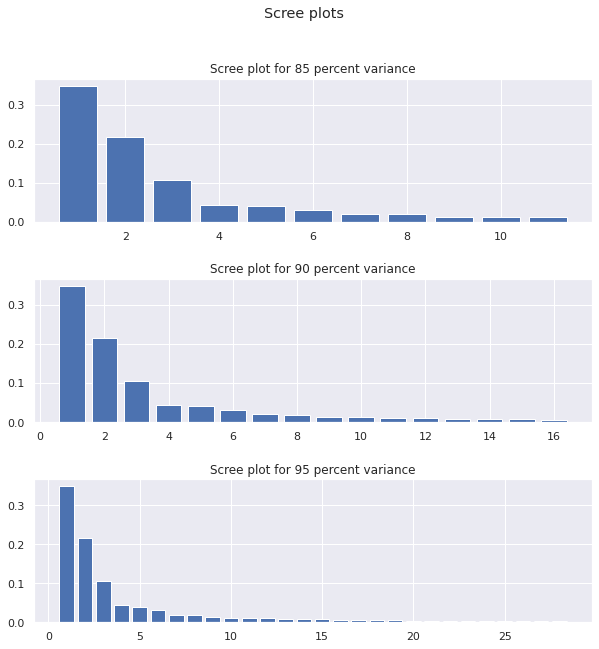

In [11]:
#scale data
scaled_data = StandardScaler().fit_transform(unlabeled_EEG)

def compute_PCA(data, percent_Var):
  pca = PCA(percent_Var)
  pca.fit(data)
  x_axis = np.arange(1,pca.n_components_ + 1)
  return (x_axis, pca.explained_variance_ratio_, pca.fit_transform(data))


#Make models
models = []
scale = 0.0
for i in range(3):
  models.append(compute_PCA(scaled_data, 0.85 + scale))
  scale = scale + 0.05

print('Number of PCs for plot 1: ', len((models[0])[0]))
print('Number of PCs for plot 2: ', len((models[1])[0]))
print('Number of PCs for plot 3: ', len((models[2])[0]))
print('Highest explained variance: ', max((models[0])[1]))

#Plot values
screeFig = plt.figure(figsize=(10,10))
screeFig.subplots_adjust(hspace=.4)
screeFig.suptitle('Scree plots')
ax1 = plt.subplot(311)
ax1.set_title('Scree plot for 85 percent variance')
ax1.bar(models[0][0], models[0][1])

ax2 = plt.subplot(312)
ax2.set_title('Scree plot for 90 percent variance')
ax2.bar(models[1][0], models[1][1])

ax3 = plt.subplot(313)
ax3.set_title('Scree plot for 95 percent variance')
ax3.bar(models[2][0], models[2][1])


#Clustering analysis: KMeans, GMM, HC, DBSCAN

##Kmeans

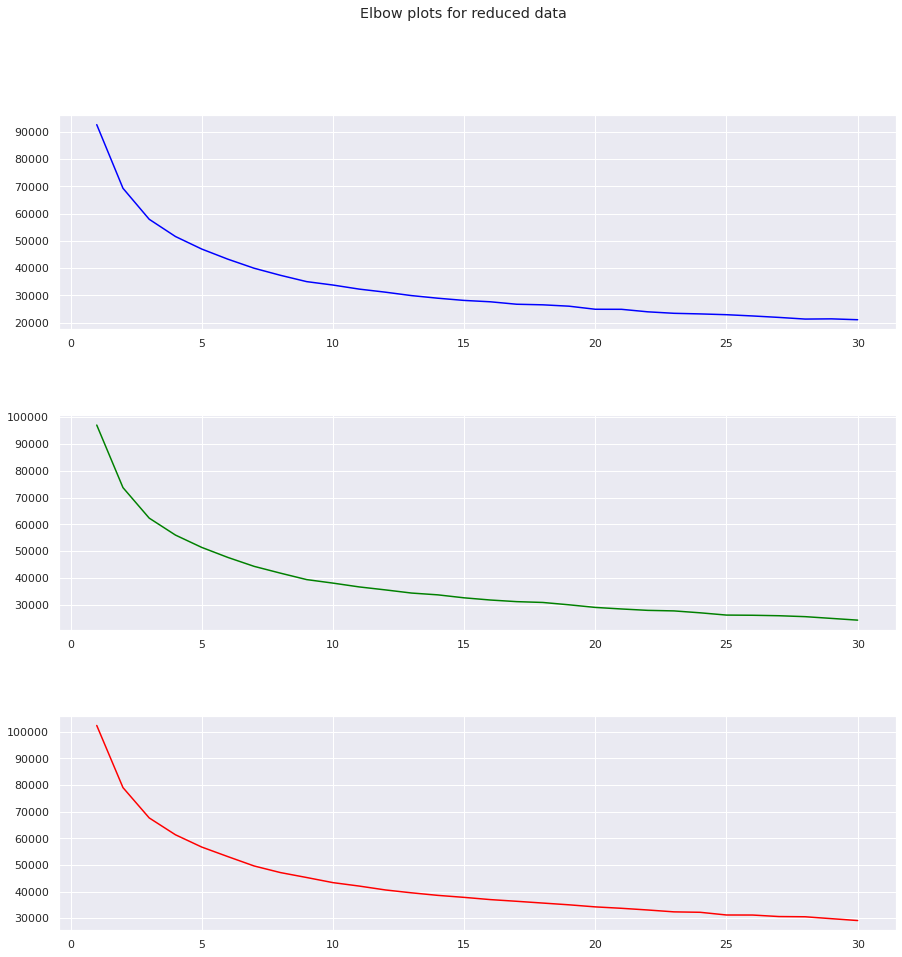

In [12]:
#Select num clusters
K = 30

def KMeans_analysis(K, data):
  distortion = []
  predictions = []
  x_axis = np.arange(1,K+1)
  for i in range(1,K+1):
    km = KMeans(n_clusters=i)
    km.fit(data)
    distortion.append(km.inertia_)
    predictions.append(km.predict(data))
  return (x_axis, distortion, predictions)


elbowFig = plt.figure(figsize=(15,15))
elbowFig.subplots_adjust(hspace=.4)
elbowFig.suptitle('Elbow plots for reduced data')
predicted_labels = []
color_List = ['blue', 'green', 'red', 'brown', 'peru', 'purple']

for i, model in enumerate(models):
  proj_data = model[2]
  x_axis, distortion, predictions = KMeans_analysis(K, proj_data)

  predicted_labels.append(predictions)

  ax = elbowFig.add_subplot(3,1, i+1)
  ax.plot(x_axis, distortion, color=color_List[i])






# Elbow plots for subdata sets

Text(0.5, 1.0, 'Elbow plot for depression subdata by each wave')

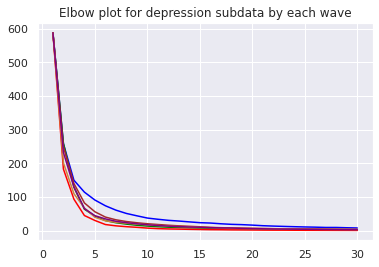

In [23]:
color_List = ['blue', 'green', 'red', 'brown', 'peru', 'purple']
#blue -> delta
#green -> theta
#red -> alpha
#brown -> beta
#peru -> highbeta
#purple -> gamma
for i, stuff in enumerate(depression_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :2]))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for depression subdata by each wave')

Elbow plot for prefrontal sensors and temporal sensors limited to schizophrenic patients and healthy controls

Text(0.5, 1.0, 'Elbow plot for panic subdata by each wave')

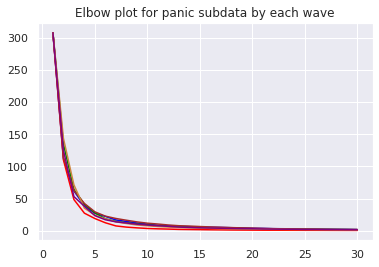

In [24]:
#color_List = ['blue', 'green', 'red', 'brown', 'peru', 'purple']
#blue -> delta
#green -> theta
#red -> alpha
#brown -> beta
#peru -> highbeta
#purple -> gamma
for i, stuff in enumerate(panic_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :2]))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for panic subdata by each wave')

Text(0.5, 1.0, 'Elbow plot for anxiety subdata by each wave')

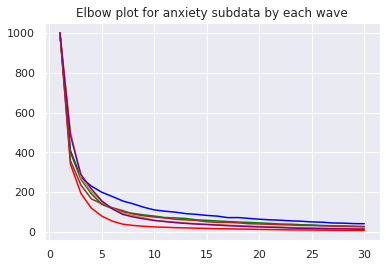

In [15]:
for i, stuff in enumerate(anxiety_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for anxiety subdata by each wave')

Text(0.5, 1.0, 'Elbow plot for Bipolar subdata by each wave')

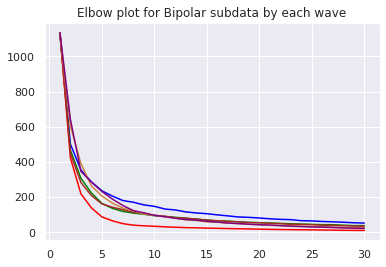

In [45]:
list_of_predictions = []
for i, stuff in enumerate(Bipolar_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  list_of_predictions.append(predictions)
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for Bipolar subdata by each wave')

Text(0.5, 1.0, 'Elbow plot for schizo subdata by each wave')

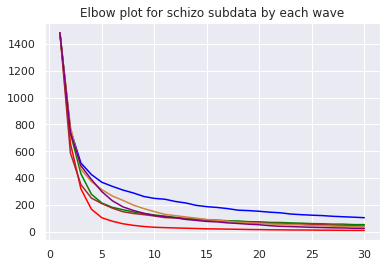

In [17]:
for i, stuff in enumerate(Schizo_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for schizo subdata by each wave')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

Text(0.5, 1.0, 'Elbow plot for depression subdata by each wave')

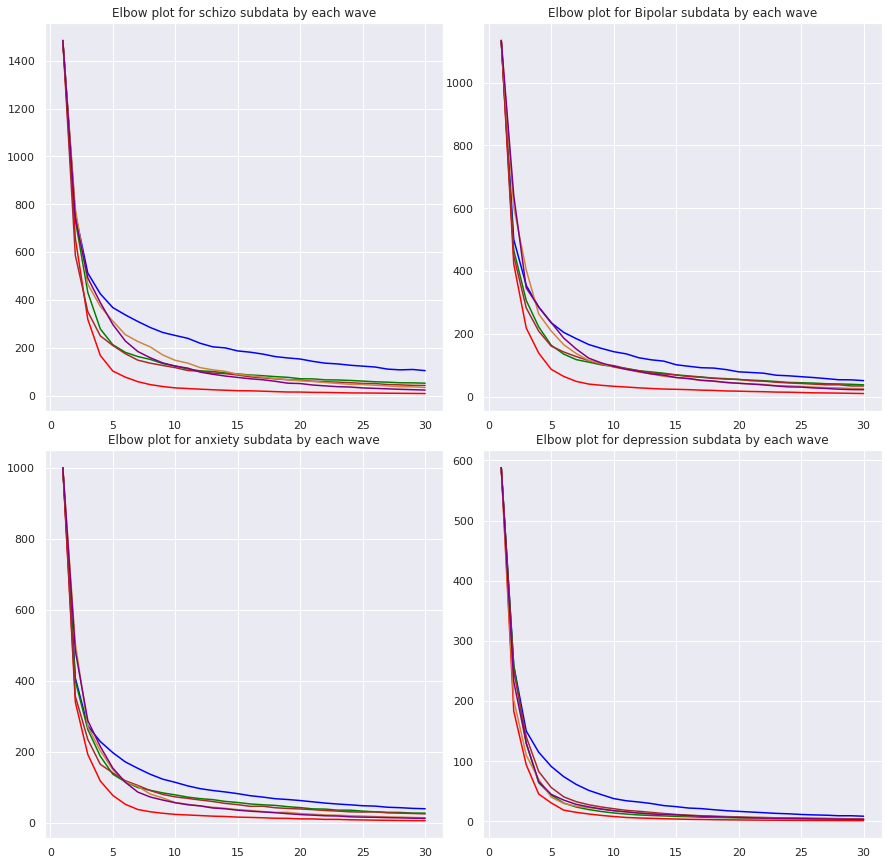

In [36]:
color_List = ['blue', 'green', 'red', 'brown', 'peru', 'purple']

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=.1, wspace=.1)
for i, stuff in enumerate(Schizo_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  ax = fig.add_subplot(221)
  ax.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for schizo subdata by each wave')

for i, stuff in enumerate(Bipolar_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  ax = fig.add_subplot(222)
  ax.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for Bipolar subdata by each wave')

for i, stuff in enumerate(anxiety_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  ax = fig.add_subplot(223)
  ax.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for anxiety subdata by each wave')

for i, stuff in enumerate(depression_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :2]))
  ax = fig.add_subplot(224)
  ax.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for depression subdata by each wave')

Text(0.5, 1.0, 'Elbow plot for OCD subdata by each wave')

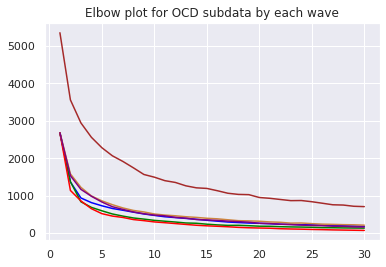

In [20]:
for i, stuff in enumerate(OCD_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for OCD subdata by each wave')

Text(0.5, 1.0, 'Elbow plot for ptsd subdata by each wave')

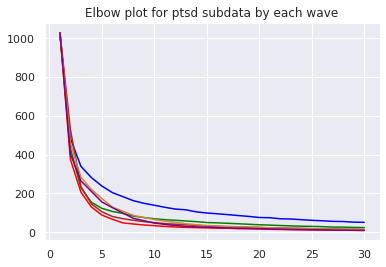

In [19]:
for i, stuff in enumerate(ptsd_data_byWave):
  data, labels = stuff
  x_axis, distortion, predictions = KMeans_analysis(K, StandardScaler().fit_transform(data.iloc[:, :7]))
  plt.plot(x_axis, distortion, color=color_List[i])

plt.title('Elbow plot for ptsd subdata by each wave')

## GMM

Text(0.5, 1.0, 'NMI score against number of clusters')

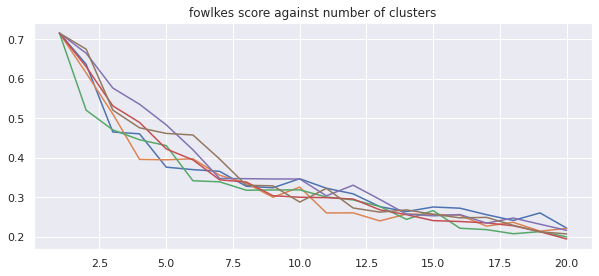

In [39]:
def gmm_analysis(K, data, metric, arg):
  distortion = []
  for i in range(1,K+1):
    gmm = GaussianMixture(i, max_iter=1000)
    labels = gmm.fit_predict(data)
    distortion.append(metric(arg, labels))
  return distortion, labels

gmmFig = plt.figure(figsize=(10,10))
gmmFig.subplots_adjust(hspace=.4)
ax_fms = gmmFig.add_subplot(211)

for data, label in Bipolar_data_byWave:
  x_axis = np.arange(1, 21)
  proj_data = PCA(.95).fit_transform(StandardScaler().fit_transform(data.iloc[:, :2]))
  fms_values, prediction = gmm_analysis(20, proj_data, metrics.fowlkes_mallows_score, label)
  ax_fms.plot(x_axis, fms_values)

ax_fms.set_title('fowlkes score against number of clusters')

ax_NMI.set_title('NMI score against number of clusters')


In [ ]:
from scipy.cluster.hierarchy import dendrogram

hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

#method from sklearn
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#hc.fit(models[1][2])

#plot_dendrogram(hc, truncate_mode="level", p = 4)
#plt.title('Hierarchial clustering with PCA')

Text(0.5, 1.0, 'Hierarchial on depression vs control')

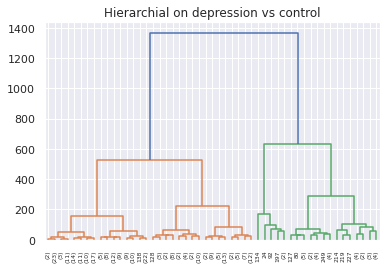

In [ ]:
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

hc.fit((depression_data_byWave[2])[0].iloc[:, :7])

plot_dendrogram(hc, truncate_mode='level', p = 5)
plt.title('Hierarchial on depression vs control')

(212, 4)


Text(0.5, 1.0, 'Hierarchial on schizophrenia vs healthy control')

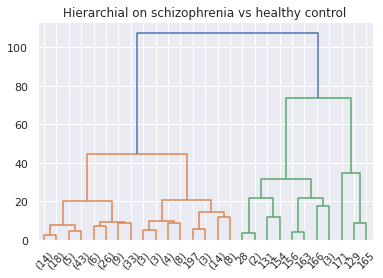

In [ ]:
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

hc.fit(Schizo_data_byWave[2][0])

plot_dendrogram(hc, truncate_mode='level', p = 4)
plt.title('Hierarchial on schizophrenia vs healthy control')